In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

data=pd.read_csv('data/trainFans0.txt')
predData=pd.read_csv('data/trainFans10.txt',sep=';')
#data.fillna(0,inplace=True)
#fans_data=data[['is_spammer','followers_count','follow_count','post_count','hot_blog_count']].values
pred_fans_data=predData[['followers_count','follow_count','post_count']].values
#pred_fans_data=predData[['followers_count','follow_count','post_count','hot_blog_count']].values
#y=data[['favourites_count','bi_followers_count','user_ability']].values
y=data['favourites_count'].values
X=data[['followers_count','follow_count','post_count']].values
#X=data[['followers_count','follow_count','post_count','hot_blog_count']].values
#lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# print(X_new)
#x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, train_size=0.6)
clf1 = svm.SVC(C=0.8, kernel='linear', gamma=10, decision_function_shape='ovr')
clf1.fit(X,y1)
pred_result1=clf1.predict(pred_fans_data)
predData['favourites_count']=pred_result1
clf2 = svm.SVC(C=0.8, kernel='linear', gamma=10, decision_function_shape='ovr')
clf2.fit(X,y2)
pred_result2=clf1.predict(pred_fans_data)
predData['bi_followers_count']=pred_result2
clf3 = svm.SVC(C=0.8, kernel='linear', gamma=10, decision_function_shape='ovr')
clf3.fit(X,y3)
pred_result3=clf1.predict(pred_fans_data)
predData['user_ability']=pred_result3
# print(pred_result)
# spammer = predData['is_spammer']
# predData.drop(labels=['is_spammer'], axis=1,inplace = True)
# predData.insert(0, 'is_spammer', spammer)
# predData['favourites_count']=0
# predData['bi_followers_count']=0
# predData['user_ability']=0
predData.to_csv('data/trainFans10.txt', header=True, index=None, sep=';', mode='w')
#clf.fit(x_train, y_train.ravel())
#print(clf.score(x_train, y_train))  # 精度
# y_hat = clf.predict(x_train)
#show_accuracy(y_hat, y_train, '训练集')
#print(clf.score(x_test, y_test))
# y_hat = clf.predict(x_test)
#show_accuracy(y_hat, y_test, '测试集')

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
clf.feature_importances_

d:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.        , 0.13011763, 0.09445734, 0.24572062, 0.03274588,
       0.08382322, 0.18805174, 0.13692918, 0.08815439])

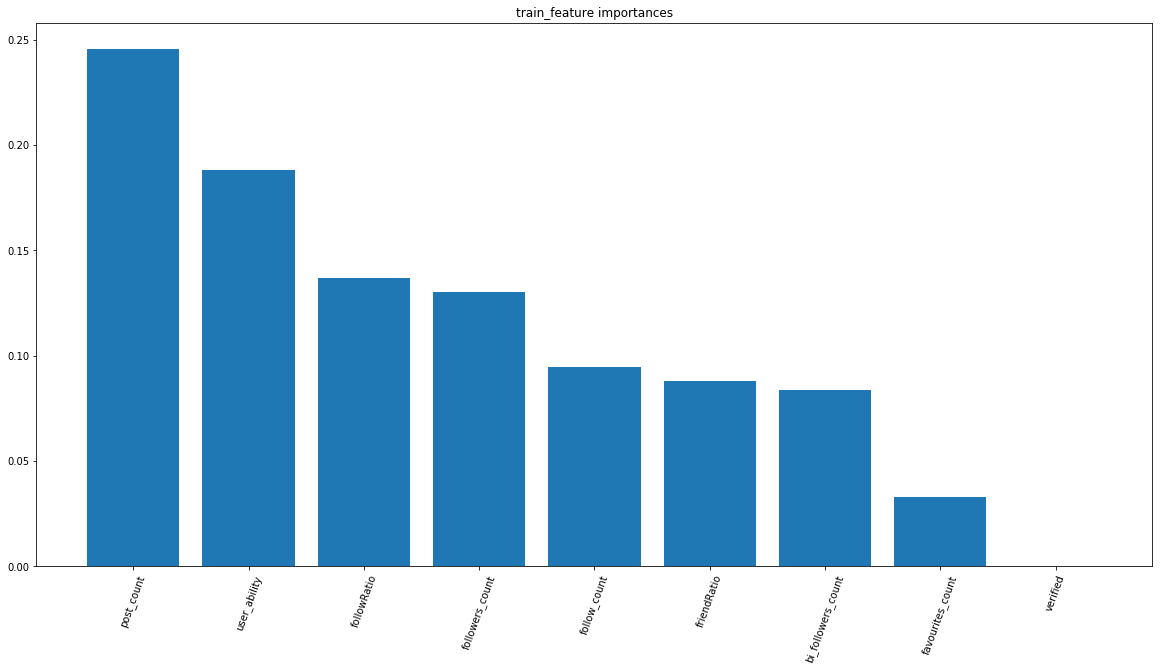

In [5]:
import matplotlib.pyplot as plt

def featureVis(regressor, train_feature):
    importances = regressor.feature_importances_
    indices = np.argsort(importances)[::-1]
    selected_features = [train_feature[e] for e in indices]
    plt.figure(figsize=(20, 10))
    plt.title("train_feature importances")
    plt.bar(range(len(train_feature)), importances[indices],align="center")
    plt.xticks(range(len(selected_features)), selected_features, rotation=70)
    plt.show()

train_feature = ['verified','followers_count','follow_count','post_count','favourites_count','bi_followers_count','user_ability','followRatio','friendRatio']
featureVis(clf,train_feature)

In [9]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(664, 4)

In [12]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
scoring = ['precision_macro', 'recall_macro','f1_macro'] # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf, X, y, scoring=scoring,cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)

测试结果： {'fit_time': array([0.0100069 , 0.03125191, 0.0469451 , 0.03132129, 0.04688334]), 'score_time': array([0.00411177, 0.01562715, 0.        , 0.03120661, 0.0156436 ]), 'test_precision_macro': array([0.88255495, 0.83642857, 0.85863095, 0.94303632, 0.90981508]), 'train_precision_macro': array([0.99736842, 1.        , 1.        , 0.9973822 , 0.9973822 ]), 'test_recall_macro': array([0.90479651, 0.84229651, 0.86195244, 0.92440551, 0.86057572]), 'train_recall_macro': array([0.99853372, 1.        , 1.        , 0.99853801, 0.99853801]), 'test_f1_macro': array([0.89000938, 0.83913565, 0.86023046, 0.93256705, 0.87777778]), 'train_f1_macro': array([0.99794652, 1.        , 1.        , 0.9979556 , 0.9979556 ])}


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.ensemble import ExtraTreesClassifier

data=pd.read_csv('data/trainFans0.txt')
X=data[['followers_count','follow_count','favourites_count','bi_followers_count','user_ability','followRatio','friendRatio']].values
y=data['is_spammer'].values
clf = ExtraTreesClassifier()
clf = clf.fit(X, y)
scoring = ['precision_macro'] # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf, X, y, scoring=scoring,cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)

测试结果： {'fit_time': array([0.01398635, 0.01000285, 0.00900674, 0.00900698, 0.00900674]), 'score_time': array([0.00200129, 0.00200558, 0.0010004 , 0.00100064, 0.00200272]), 'test_precision_macro': array([0.88428571, 0.79001976, 0.80902439, 0.8125    , 0.81847826]), 'train_precision_macro': array([0.97493123, 0.97944111, 0.98181988, 0.99008639, 0.98362573])}


d:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

data=pd.read_csv('data/trainFans0.txt')
predData=pd.read_csv('data/trainFans10.txt',sep=';')
#data.fillna(0,inplace=True)
#fans_data=data[['is_spammer','followers_count','follow_count','post_count','hot_blog_count']].values
pred_fans_data=predData[['followers_count','follow_count','post_count']].values
#pred_fans_data=predData[['followers_count','follow_count','post_count','hot_blog_count']].values
#y=data[['favourites_count','bi_followers_count','user_ability']].values
y=data['favourites_count'].values
X=data[['followers_count','follow_count','post_count']].values
lr = LinearRegression()
lr.fit(X,y)
pred_result=lr.predict(pred_fans_data)
predData['favourites_count']=pred_result
# print(pred_result)
# spammer = predData['is_spammer']
# predData.drop(labels=['is_spammer'], axis=1,inplace = True)
# predData.insert(0, 'is_spammer', spammer)
# predData['favourites_count']=0
# predData['bi_followers_count']=0
# predData['user_ability']=0
predData.to_csv('data/trainFans10.txt', header=True, index=None, mode='w')

In [5]:
data=pd.read_csv('data/trainFans0.txt')
spaNum=0
norNum=0
for i in range(len(data)):
    if data['is_spammer'][i]==1:
        spaNum=spaNum+1
    if data['is_spammer'][i]==0:
        norNum=norNum+1
print(spaNum)
print(norNum)

427
237
